# Prosper Loan


### Inverstigation Overview
This presentation explores the factors that affected the original loan amount specifically for professionals. I focused on different variables regarding their credit grade, loan status, proper score, and monthly loan payment.

### Dataset Overview
The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

I eliminated some of the variables and focued on the variables I was interested in.

### Propertion of all the borrowers are homeowners
#### What is the percentage of the borrowers are homeowners?

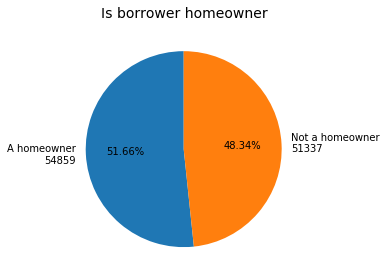

In [21]:
# Create a pie chart to show the proportion of homeowners out of all borrowers
homeowner = df['IsBorrowerHomeowner'].value_counts()
labels = f'A homeowner\n{homeowner.values[0]}', f'Not a homeowner\n{homeowner.values[1]}'
plt.pie(homeowner, labels=labels, startangle=90, counterclock=True, autopct='%.2f%%');
plt.axis('square');
plt.title('Is borrower homeowner\n', fontsize=14);

There are 51.66% out of all borrowers are homeowners.

### Most of the borrowers have income range from 25,000-49,999

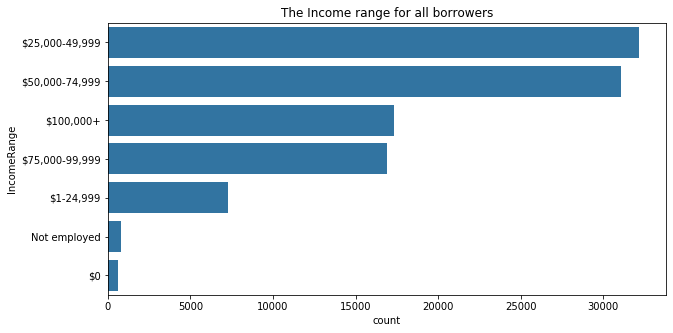

In [22]:
# Create a count plot to explore the counts for each income range
plt.figure(figsize = [10, 5]) 
base_color = sns.color_palette()[0]
plt.title("The Income range for all borrowers")
sns.countplot(data = df, y = 'IncomeRange', color = base_color,
             order = df['IncomeRange'].value_counts().index );

### Most of the loan status is current.

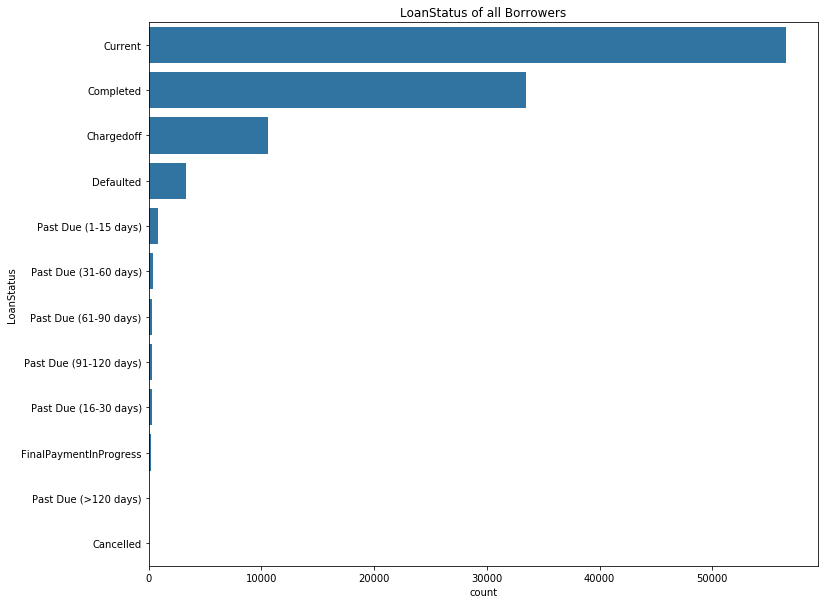

In [24]:
# Create a count plot to explore the counts for each 'LoanStatus'
plt.figure(figsize = [12, 10]) 
base_color = sns.color_palette()[0]
plt.title("LoanStatus of all Borrowers")
sns.countplot(data = df, y = 'LoanStatus', color = base_color,
             order = df['LoanStatus'].value_counts().index);


### Most of the employment status is employed.

C:\Users\jieha\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


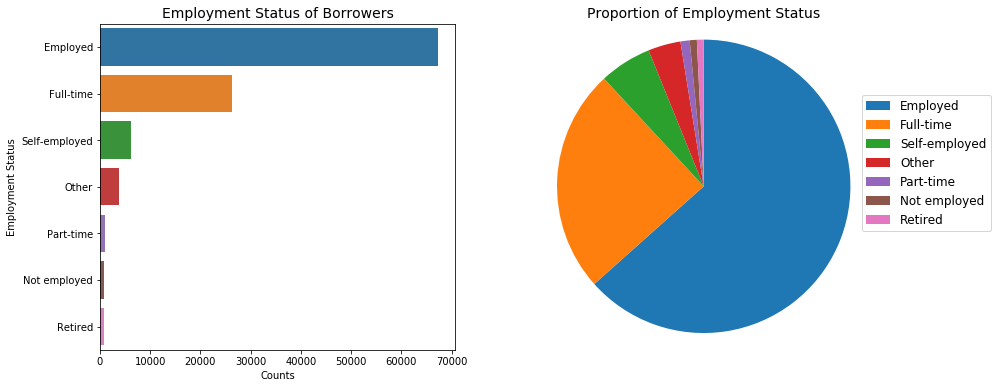

In [28]:
# Create a barplot and a pie chart to compare the proportion of each empoyment status
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
counts = [counts[i] for i in ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired']]
sns.barplot(counts, ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired'])
plt.xlabel('Counts')
plt.ylabel('Employment Status')
plt.title('Employment Status of Borrowers', fontsize=14)

plt.subplot(1, 2, 2)
#labels = [f'{j}\n{counts[i]:.2f}min' for i, j in enumerate(['Employed', 'Full-time', 'Self-employed', 'Other', 'Part-time', 'Not employed', 'Retired'])]
labels = ['Employed', 'Full-time', 'Self-employed', 'Other', 
       'Part-time', 'Not employed', 'Retired']
#plt.pie(counts, labels=labels, startangle=90, counterclock=False, autopct='%1.1f%%');
pie = plt.pie(counts, startangle=90, counterclock=False);
plt.legend(pie[0], labels, bbox_to_anchor = (1.4,0.8), loc = 'upper right',fontsize=12)
plt.axis('square');
plt.title('Proportion of Employment Status', fontsize=14);

###  The professional are the 16.5% out of all the occupations of the borrowers.

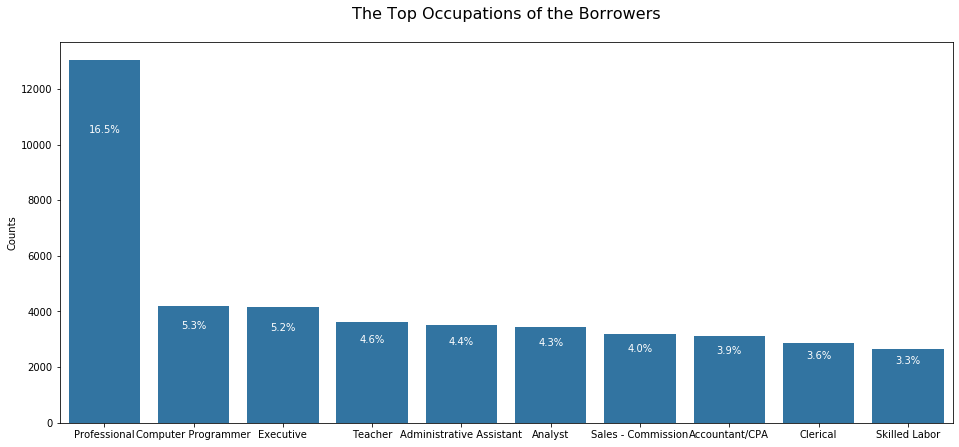

In [31]:
# Create a barplot to see the top 10 occupations
plt.figure(figsize=(16,7))
base_color = sns.color_palette()[0]
top = job['Occupation'].value_counts().head(10)
sns.barplot(top.index, top.values, color = base_color)# add annotations
n_points = job.shape[0]
gen_counts = job['Occupation'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 0.8*count, pct_string, ha = 'center', color = 'w')
plt.ylabel('Counts')
plt.title('The Top Occupations of the Borrowers\n', fontsize=16);

### 16.5% of the borrowers reside in the state of California.

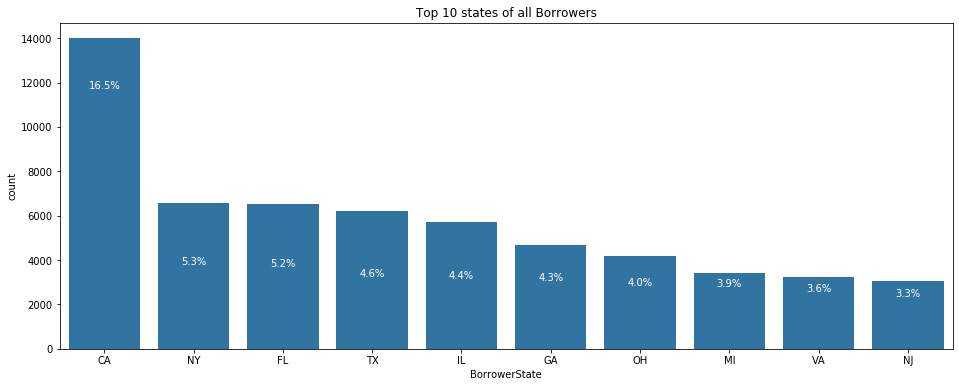

In [32]:
# Check the top 10 BorrowerState
plt.figure(figsize = [16,6]) 
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'BorrowerState', color = base_color,
             order = df['BorrowerState'].value_counts().head(10).index );

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = gen_counts[label.get_text()]
    pct_string = f'{100*count/n_points:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 0.9*count, pct_string, ha = 'center', color = 'w')
plt.title("Top 10 states of all Borrowers");

### The proportion of professionals out of all borrowers
The most credit grade for all borrowers is C. Similarly, most professionals also have credit grade C, but the relative percentage for professional is highest for credit grade E. 

Both professionals and all borrowers' loan status is *current*.

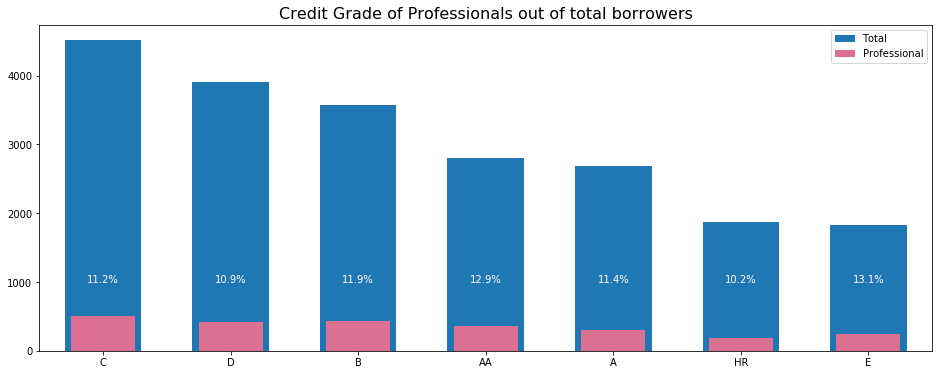

In [39]:
# Explore the proportion of professionals out of all borrowers for each credit grade
plt.figure(figsize=(16, 6))
counts = df['CreditGrade'].value_counts()
prof_counts = prof_df['CreditGrade'].value_counts()
counts.plot.bar(label='Total', width=.6)

prof_counts.reindex(counts.index).plot.bar(label='Professional', color='palevioletred')
locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    prof_count = prof_counts[label.get_text()]
    pct_string = f'{100*prof_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 1000, pct_string, ha = 'center', color='w')
plt.legend()
plt.xticks(rotation=0)
plt.title('Credit Grade of Professionals out of total borrowers', fontsize=16);

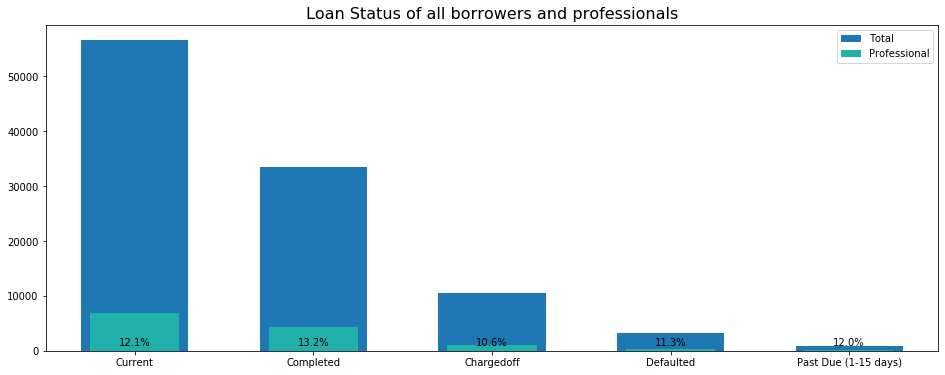

In [40]:
# Explore the proportion of professionals out of all borrowers for top 5 loan status
plt.figure(figsize=(16, 6))
counts = df['LoanStatus'].value_counts()[:5]
prof_counts = prof_df['LoanStatus'].value_counts()[:5]
counts.plot.bar(label='Total', width=.6)

prof_counts.reindex(counts.index).plot.bar(label='Professional', color='lightseagreen')

locs, labels = plt.xticks() # get the current tick locations and labels
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = counts[label.get_text()]
    prof_count = prof_counts[label.get_text()]
    pct_string = f'{100*prof_count/count:0.1f}%'
    # print the annotation just below the top of the bar
    plt.text(loc, 1000, pct_string, ha = 'center')
plt.legend()
plt.xticks(rotation=0)
plt.title('Loan Status of all borrowers and professionals', fontsize=16);

- Observation: The trends of the professional and all borrowers for the top 5 variables (for loan status, credit grade, borrow state and income range) are very similar except for the income range, where most professionals' income range is above 100,000.

#### Overall, credit grades AA,A,and B for all professionals have very similar amount of loan.  
#### The average amount of loan is correlated with the income range for the top 3 income range only.
#### The average amount of loan with current status has the largest standard deviations.
#### The average amount of loan with current status is approximately twice as much as completed loan status.

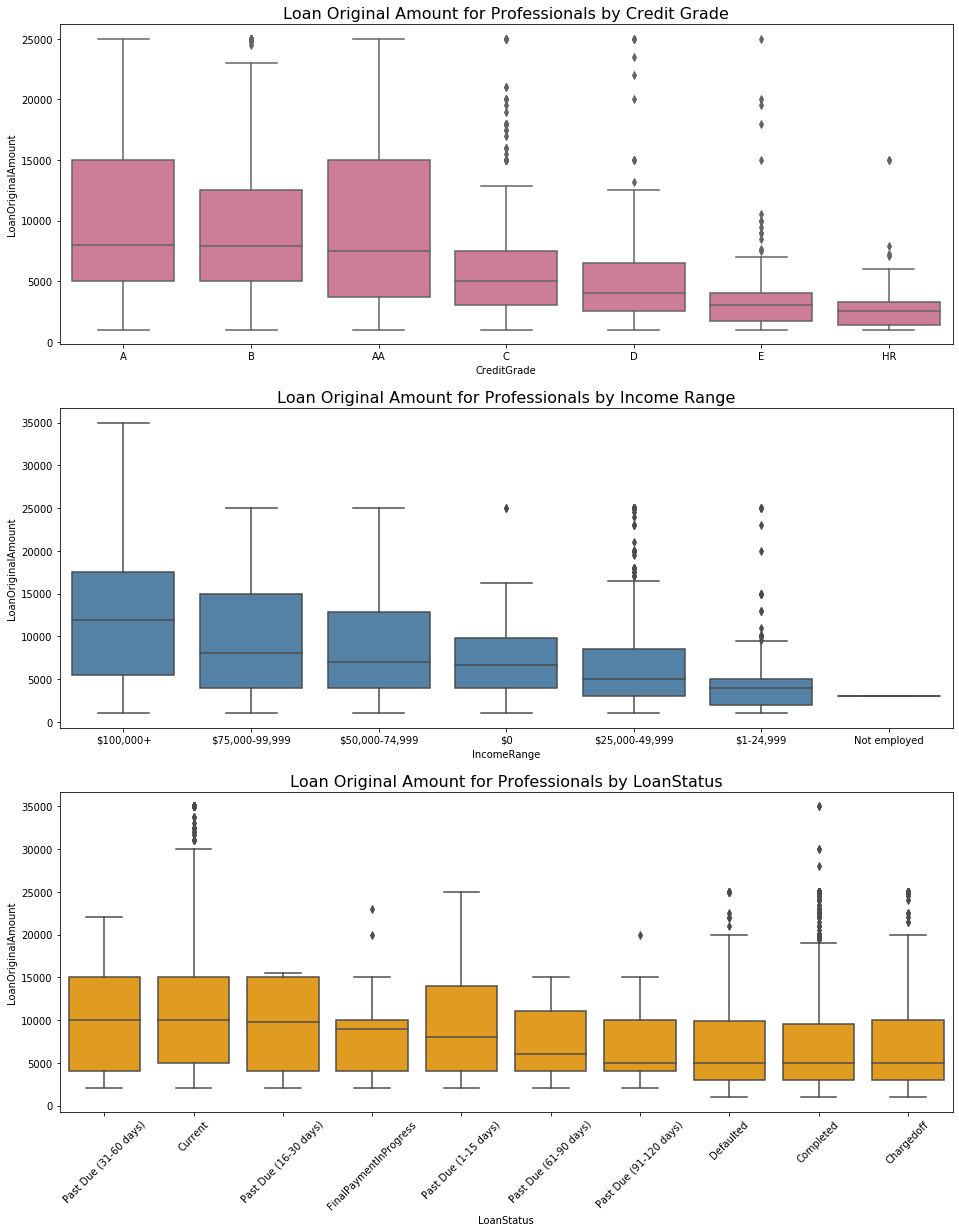

In [43]:
# use boxplot to explore the statistics and outliers of 'LoanOriginalAmount'
# with respect to 'CreditGrade','IncomeRange',and 'LoanStatus' for all professional
plt.figure(figsize= (16,20))

plt.subplot(3,1,1)
order = prof_df.groupby('CreditGrade')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='CreditGrade', y=prof_df['LoanOriginalAmount'], order=order, color = 'palevioletred');
plt.title('Loan Original Amount for Professionals by Credit Grade', fontsize=16);

plt.subplot(3,1,2)
order = prof_df.groupby('IncomeRange')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='IncomeRange', y=prof_df['LoanOriginalAmount'], order=order, color = 'steelblue');
plt.title('Loan Original Amount for Professionals by Income Range', fontsize=16);

plt.subplot(3,1,3)
order = prof_df.groupby('LoanStatus')['LoanOriginalAmount'].median().sort_values(ascending=False).index
sns.boxplot(data=prof_df, x='LoanStatus', y=prof_df['LoanOriginalAmount'], order=order, color = 'orange');
plt.xticks(rotation = 45)
plt.title('Loan Original Amount for Professionals by LoanStatus', fontsize=16);

- Observation: most of the ranges of the original loan amount with respect to income range and credit grade are widely spreaded for the excutives. 

#### The largest counts of both employed and full-time Professionals have income range from 50,000-74,999.

Text(0.5, 1.0, 'Count of Professionals')

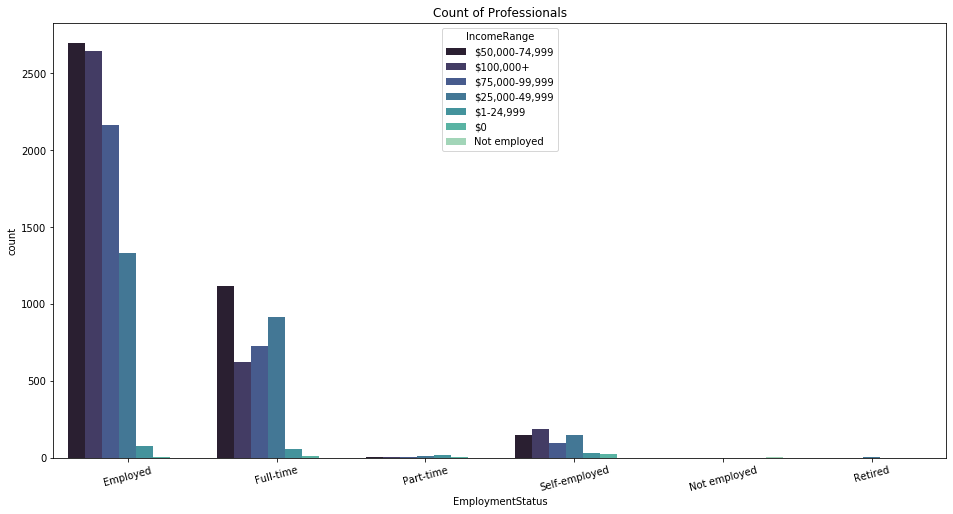

In [58]:
plt.figure(figsize = (16,8))
sns.countplot(data = prof_df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'mako')
plt.xticks(rotation = 15)
plt.title('Count of Professionals')

### Professionals with different income ranges and credit grades pay the monthly loan
For credit grades AA, A, B, C, and D, people with income range of 25,000-49,999 have relatively lower monthly loan payment comparing with people who have higher incomes even though the distribution of the debt to income ratio are not much different comparing among these groups.

Text(0.5, 1, 'Total Proper Loans by Debt/Income of Professionals')

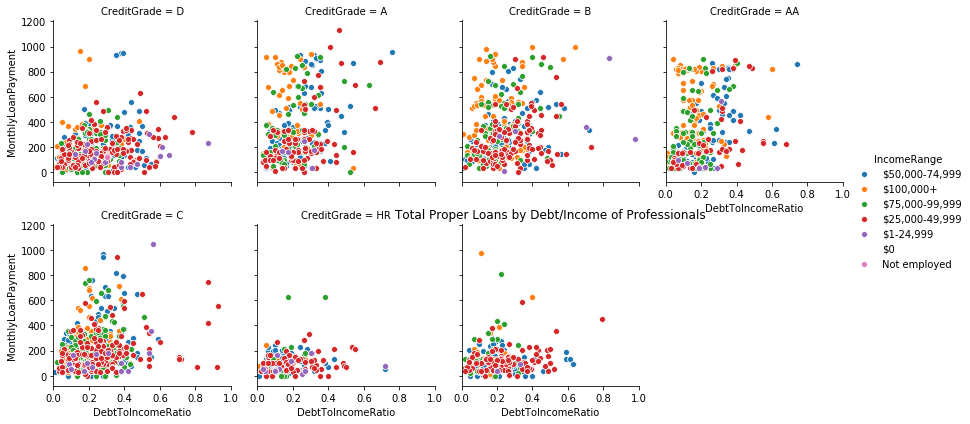

In [51]:
# Use scatter plots to viasualize the relationship between monthly payment and debt/income ratio
# for all professionals with different income ranges
g = sns.FacetGrid(data = prof_df, col = 'CreditGrade', col_wrap = 4, hue = 'IncomeRange')
g.set(xlim = (0, 1))
g.map(sns.scatterplot, 'DebtToIncomeRatio','MonthlyLoanPayment').add_legend()

plt.title('Total Proper Loans by Debt/Income of Professionals')

#### For highest paid professionals (100,000+), the final payment are in progress for those who have the lowest original loan amount. 
#### For professional whose income range in (50,000-74,999), the final payment in progress have the highest average original loan amount.

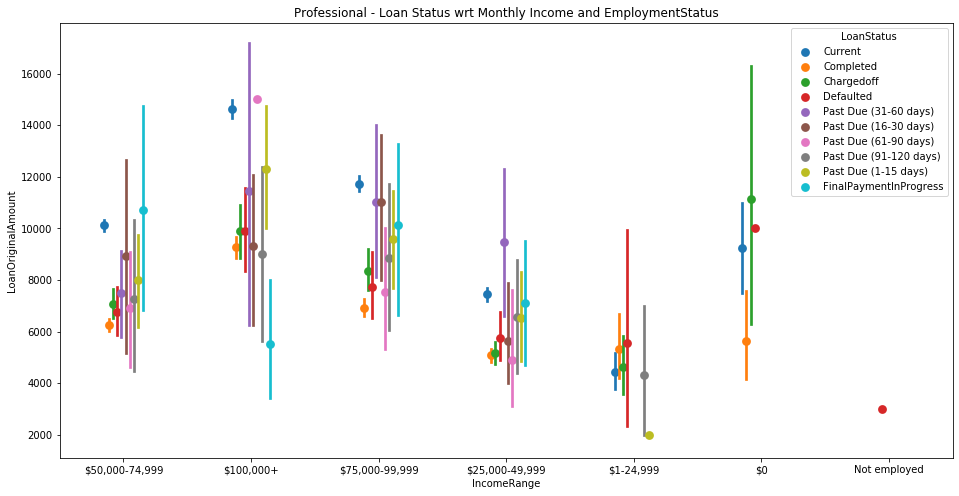

In [56]:
plt.figure(figsize = (16,8))
ax = sns.pointplot(data = prof_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
plt.title('Professional - Loan Status wrt Monthly Income and EmploymentStatus');

### Professionals with different income ranges and prosper rating take different original amount of loan
The highest original loan amount is borrowed by those who have highest 
income with a proper rating of B. Also The average loan amount for professionals with prosper rating B is highest for all income range group except for 50,000-74,999.

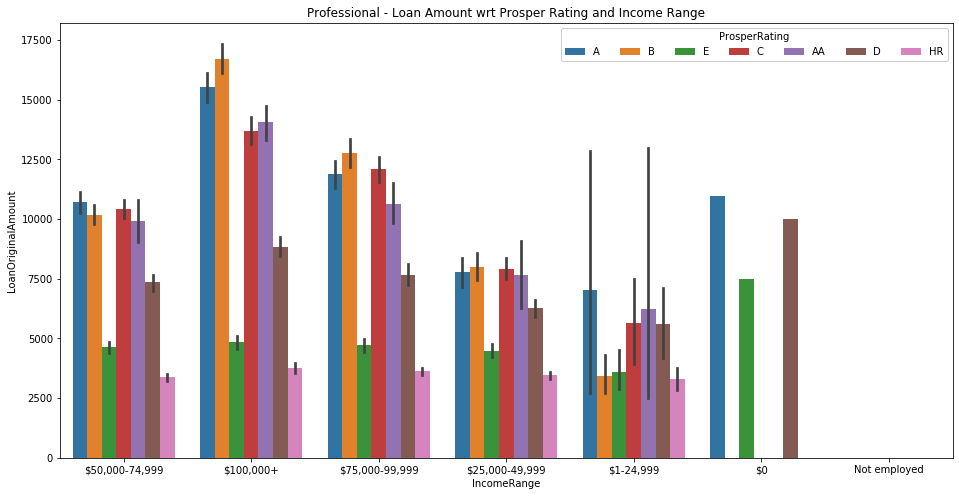

In [55]:
# Explore the relationship between loan amount for different proper rating of each income range of all professional
plt.figure(figsize = [16, 8])

ax = sns.barplot(data = prof_df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'ProsperRating (Alpha)')
ax.legend(loc = 1, ncol = 7, framealpha = 1, title = 'ProsperRating')
plt.title('Professional - Loan Amount wrt Prosper Rating and Income Range');

### Conclusions
Overall, professionals is the majority of the prosper loan borrowers. The trends of their credit grade and loan status are consistent with all the borrwowers.      
We found that their highest income range also have the most spread monthly payment amount comparing with lower range like 25,000-49,999. The credit grades of AA, A and B do not show extensive difference in the spread of plots whereas credit grades of HR and E all have lower monthly payment despite the debt to income ratios.     
The prosper ratings of AA, A, B, and C for professionals with income higher than 25,000 all took the largest amount of loan originally. Professionals with income range below 25,000 show either a high standard deviation or lower/none smaple values.